In [2]:
from diffusers import DiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTextModel
import torch

# Load the pipeline with the same arguments (model, revision) that were used for training
model_id = "codyreading/dreambooth-bb"
pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True).to("cuda")



In [1]:
# Custom Diffusion
import torch
from diffusers import DiffusionPipeline
pipe = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

checkpoint_dir = "/localhome/cra80/Checkpoints/custom_diffusion"
pipe.unet.load_attn_procs(checkpoint_dir, weight_name="pytorch_custom_diffusion_weights.bin")
pipe.load_textual_inversion(checkpoint_dir, weight_name="<new1>.bin")
pipe.load_textual_inversion(checkpoint_dir, weight_name="<new2>.bin")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 49409. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc
You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension

  0%|          | 0/100 [00:00<?, ?it/s]

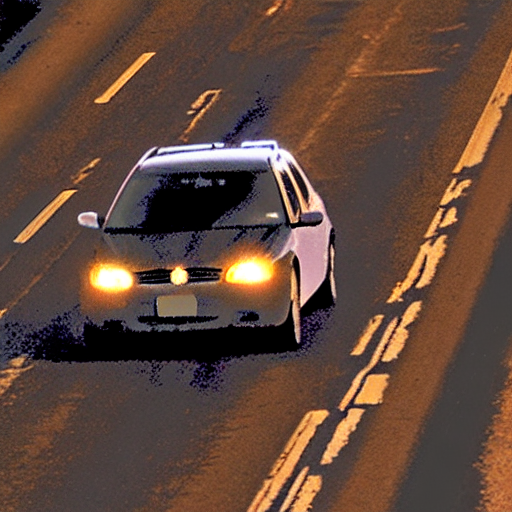

In [3]:
image = pipe(
    "a <new1> car on a <new2> road at night",
    num_inference_steps=100,
    guidance_scale=7.5,
    eta=1.0,
).images[0]
image

In [ ]:
prompt = "a photo of sks people"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
image